<a href="https://colab.research.google.com/github/kumarjitpathakbangalore/DataScienceKT/blob/main/Multivariate_testing_simpleipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create the dataset
data = {
    'Headline': ['A1', 'A1', 'A1', 'A1', 'A2', 'A2', 'A2', 'A2'],
    'Image': ['B1', 'B1', 'B2', 'B2', 'B1', 'B1', 'B2', 'B2'],
    'CTA_Button': ['C1', 'C2', 'C1', 'C2', 'C1', 'C2', 'C1', 'C2'],
    'Conversions': [100, 120, 110, 140, 130, 150, 120, 160],
    'Visitors': [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
}

df = pd.DataFrame(data)
df['Conversion_Rate'] = df['Conversions'] / df['Visitors']



In [3]:
df.head()

,Headline,Image,CTA_Button,Conversions,Visitors,Conversion_Rate
0,A1,B1,C1,100,1000,0.10
1,A1,B1,C2,120,1000,0.12
2,A1,B2,C1,110,1000,0.11
3,A1,B2,C2,140,1000,0.14
4,A2,B1,C1,130,1000,0.13


In [4]:
# Perform ANOVA
model = ols('Conversion_Rate ~ C(Headline) + C(Image) + C(CTA_Button)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)



                 sum_sq   df     F    PR(>F)
C(Headline)    0.001013  1.0  16.2  0.015800
C(Image)       0.000113  1.0   1.8  0.250815
C(CTA_Button)  0.001513  1.0  24.2  0.007933
Residual       0.000250  4.0   NaN       NaN


##Interpretation:



*  ** Headline:** The F-statistic is 16.2 with a p-value of 0.0158. Since the p-value is less than 0.05, we can conclude that the headline has a statistically significant effect on the conversion rate.
*  ** Image: **The F-statistic is 1.8 with a p-value of 0.2508. Since the p-value is greater than 0.05, we can conclude that the image does not have a statistically significant effect on the conversion rate.
*   **CTA Button:** The F-statistic is 24.2 with a p-value of 0.0079. Since the p-value is less than 0.05, we can conclude that the CTA button has a statistically significant effect on the conversion rate.






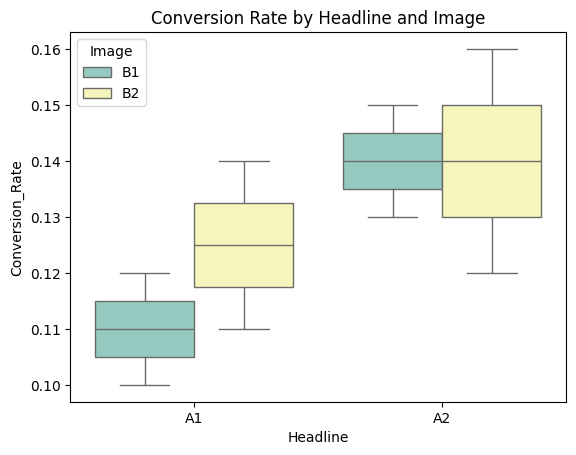

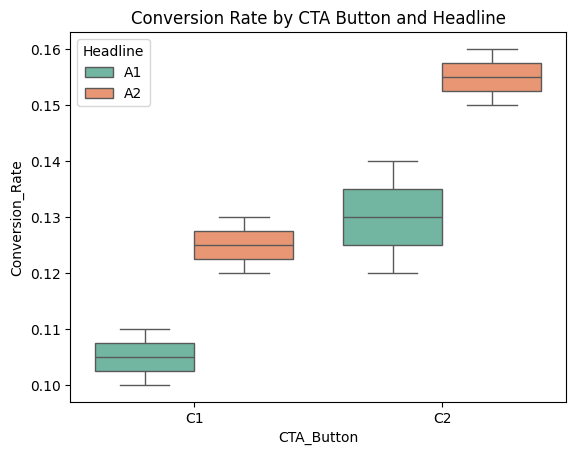

In [5]:
# Visualize the results
sns.boxplot(x='Headline', y='Conversion_Rate', hue='Image', data=df, palette='Set3')
plt.title('Conversion Rate by Headline and Image')
plt.show()

sns.boxplot(x='CTA_Button', y='Conversion_Rate', hue='Headline', data=df, palette='Set2')
plt.title('Conversion Rate by CTA Button and Headline')
plt.show()

## This is all good for simple and unbiased allocation scenarios. Let's assume that our sample allocation for each of the group is not apple tp apple .

In cases where sample selection bias is complex and influenced by many known and unknown factors, we need to have advanced ways to handle that:

**High-dimensional Propensity Score Models:**
Use machine learning models such as random forests, gradient boosting machines, or neural networks to estimate propensity scores. These models can handle high-dimensional data and capture complex relationships between covariates and treatment assignment.

**Causal Inference Methods:**
Employ advanced causal inference methods such as Instrumental Variables (IV), Difference-in-Differences (DiD), or Synthetic Control Methods to address unobserved confounders and complex sample selection biases.

**Generalized Propensity Score:**
Use generalized propensity scores for continuous or multivalued treatments. This method extends the traditional propensity score matching to handle more complex treatment scenarios.

**Sensitivity Analysis:**
Conduct sensitivity analysis to assess how robust your findings are to potential unmeasured confounders. This helps to understand the potential impact of unknown factors on your results.

**Hierarchical Models:**
Use hierarchical or multilevel models to account for the structure in your data and model complex relationships between variables and treatment assignment.

**Bayesian Approaches:**
Implement Bayesian models to incorporate prior knowledge and handle complex, high-dimensional data structures. Bayesian methods can provide more flexibility in dealing with unknown factors.

Let me show you a simple approach to do a propensity matching and understanding impact of each feature when sample selection is biased.

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Sample data with additional covariates
data = {
    'Headline': ['A1', 'A1', 'A1', 'A1', 'A2', 'A2', 'A2', 'A2'],
    'Image': ['B1', 'B1', 'B2', 'B2', 'B1', 'B1', 'B2', 'B2'],
    'CTA_Button': ['C1', 'C2', 'C1', 'C2', 'C1', 'C2', 'C1', 'C2'],
    'Conversions': [100, 120, 110, 140, 130, 150, 120, 160],
    'Visitors': [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
    'Age': [25, 30, 22, 35, 40, 45, 28, 32],
    'Location': ['Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural']
}

df = pd.DataFrame(data)
df['Conversion_Rate'] = df['Conversions'] / df['Visitors']


In [11]:
df.head()

,Headline,Image,CTA_Button,Conversions,Visitors,Age,Location,Conversion_Rate
0,A1,B1,C1,100,1000,25,Urban,0.10
1,A1,B1,C2,120,1000,30,Rural,0.12
2,A1,B2,C1,110,1000,22,Urban,0.11
3,A1,B2,C2,140,1000,35,Rural,0.14
4,A2,B1,C1,130,1000,40,Urban,0.13


In [12]:
# Create a treatment variable for propensity score matching
df['Treatment'] = df['Headline'].apply(lambda x: 1 if x == 'A2' else 0)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Location'], drop_first=True)


In [13]:
df.head()

,Headline,Image,CTA_Button,Conversions,Visitors,Age,Conversion_Rate,Treatment,Location_Urban
0,A1,B1,C1,100,1000,25,0.10,0,True
1,A1,B1,C2,120,1000,30,0.12,0,False
2,A1,B2,C1,110,1000,22,0.11,0,True
3,A1,B2,C2,140,1000,35,0.14,0,False
4,A2,B1,C1,130,1000,40,0.13,1,True


In [16]:
covariates = ['Age', 'Location_Urban']

In [17]:
# Fit a random forest model to estimate propensity scores
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(df[covariates], df['Treatment'])
df['Propensity_Score'] = rf_model.predict_proba(df[covariates])[:, 1]


In [18]:
# Perform matching using Nearest Neighbors
nn = NearestNeighbors(n_neighbors=1)
treated = df[df['Treatment'] == 1]
control = df[df['Treatment'] == 0]
nn.fit(control[['Propensity_Score']])
distances, indices = nn.kneighbors(treated[['Propensity_Score']])
matched_control_indices = indices.flatten()
matched_control = control.iloc[matched_control_indices]

In [19]:
# Combine the treated group with the matched control group
matched_data = pd.concat([treated, matched_control])


In [20]:
matched_data.head()

,Headline,Image,CTA_Button,Conversions,Visitors,Age,Conversion_Rate,Treatment,Location_Urban,Propensity_Score
4,A2,B1,C1,130,1000,40,0.13,1,True,0.82
5,A2,B1,C2,150,1000,45,0.15,1,False,0.82
6,A2,B2,C1,120,1000,28,0.12,1,True,0.59
7,A2,B2,C2,160,1000,32,0.16,1,False,0.70
1,A1,B1,C2,120,1000,30,0.12,0,False,0.26


In [21]:
# Perform ANOVA on the matched data
matched_data['Conversion_Rate'] = matched_data['Conversions'] / matched_data['Visitors']
anova_model = ols('Conversion_Rate ~ C(Headline) + C(Image) + C(CTA_Button)', data=matched_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)


In [22]:
# Print the matched data and the ANOVA table
print("Matched Data:")
print(matched_data[['Headline', 'Image', 'CTA_Button', 'Conversions', 'Visitors', 'Conversion_Rate', 'Propensity_Score']])
print("\nANOVA Table:")
print(anova_table)

Matched Data:
  Headline Image CTA_Button  Conversions  Visitors  Conversion_Rate  \
4       A2    B1         C1          130      1000             0.13   
5       A2    B1         C2          150      1000             0.15   
6       A2    B2         C1          120      1000             0.12   
7       A2    B2         C2          160      1000             0.16   
1       A1    B1         C2          120      1000             0.12   
1       A1    B1         C2          120      1000             0.12   
1       A1    B1         C2          120      1000             0.12   
1       A1    B1         C2          120      1000             0.12   

   Propensity_Score  
4              0.82  
5              0.82  
6              0.59  
7              0.70  
1              0.26  
1              0.26  
1              0.26  
1              0.26  

ANOVA Table:
                     sum_sq   df             F    PR(>F)
C(Headline)    1.225000e-03  1.0  4.900000e+01  0.002192
C(Image)       1.925

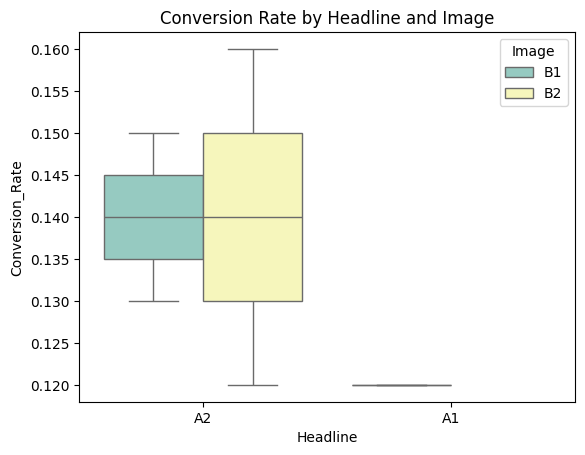

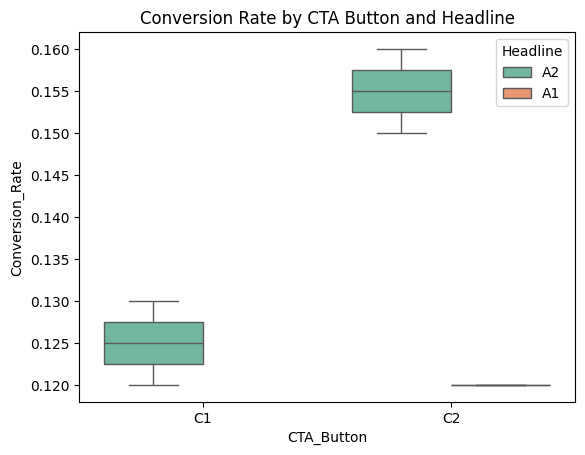

In [23]:
# Visualize the results
sns.boxplot(x='Headline', y='Conversion_Rate', hue='Image', data=matched_data, palette='Set3')
plt.title('Conversion Rate by Headline and Image')
plt.show()

sns.boxplot(x='CTA_Button', y='Conversion_Rate', hue='Headline', data=matched_data, palette='Set2')
plt.title('Conversion Rate by CTA Button and Headline')
plt.show()

##Interpretation:


*   **Headline:** The F-statistic is 49.0 with a p-value of 0.002192. This indicates that the headline has a statistically significant effect on the conversion rate.
*   **Image:** The F-statistic is extremely small, and the p-value is 1.0, indicating that the image does not have a statistically significant effect on the conversion rate.
*   **CTA Button:** The F-statistic is 36.0 with a p-value of 0.003883, showing that the CTA button has a statistically significant effect on the conversion rate.



